In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
import pickle

In [6]:
df=pd.read_csv('Titanic_train.csv')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

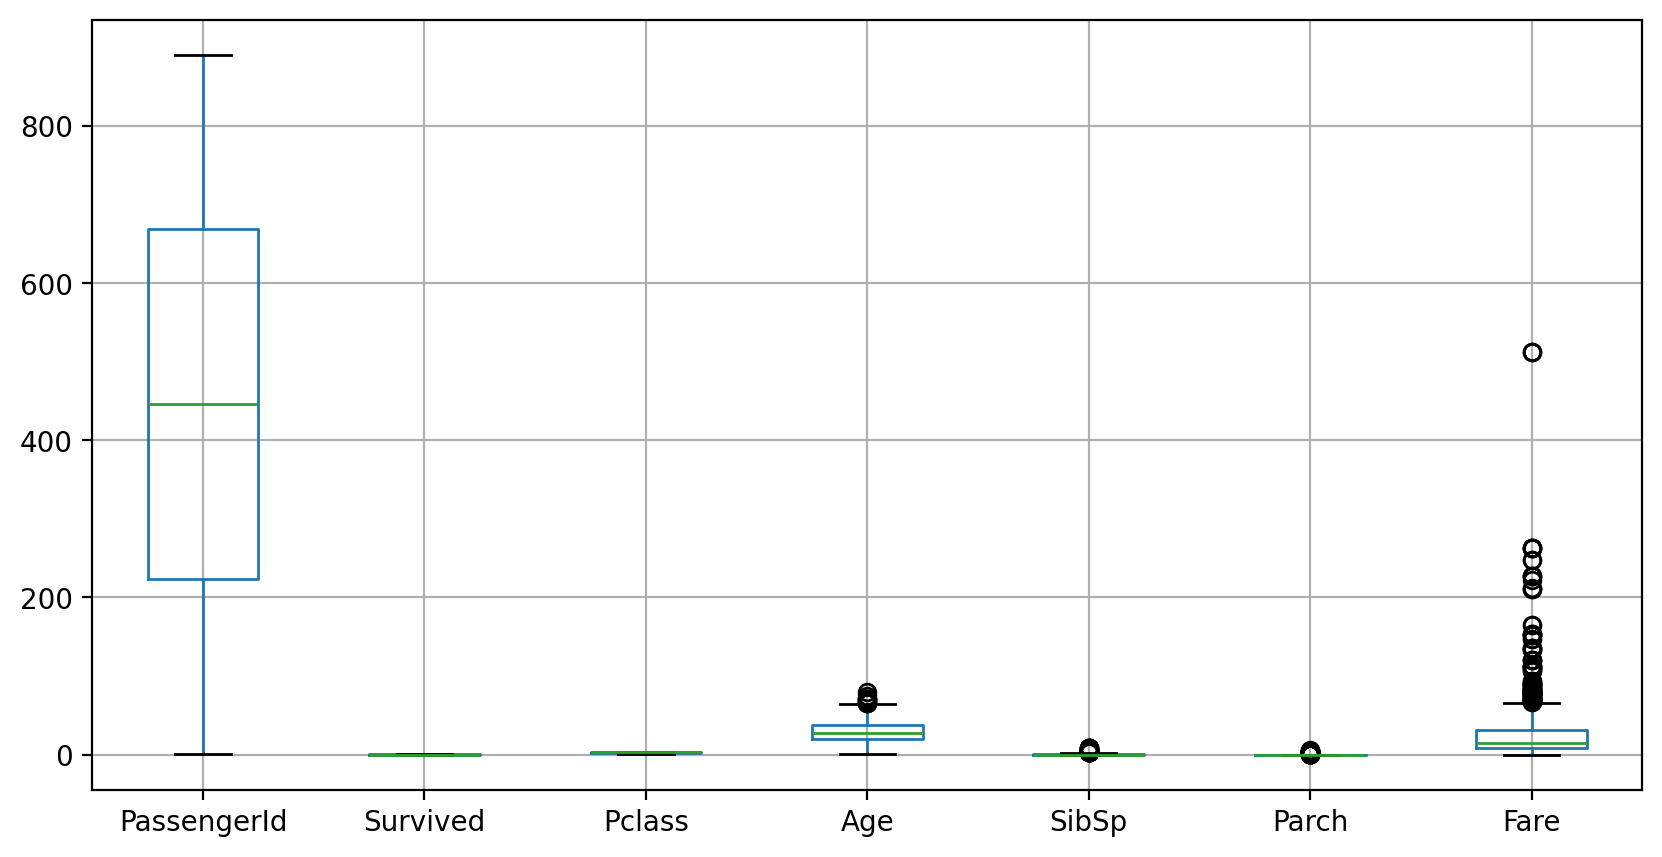

In [9]:
df.boxplot()

In [10]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing age with median value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing embarked with the mode value
df.drop(columns=['Cabin'], inplace=True)  # Drop the 'Cabin' column due to many missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Extract titles from the 'Name' column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify the 'Title' column
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Lady', 'Countess'], 'Rare')

# Create a family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Drop unnecessary columns
df.drop(columns=['Ticket', 'Name', 'PassengerId'], inplace=True)


In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' column
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# One-Hot Encode 'Embarked' and 'Title' columns
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)


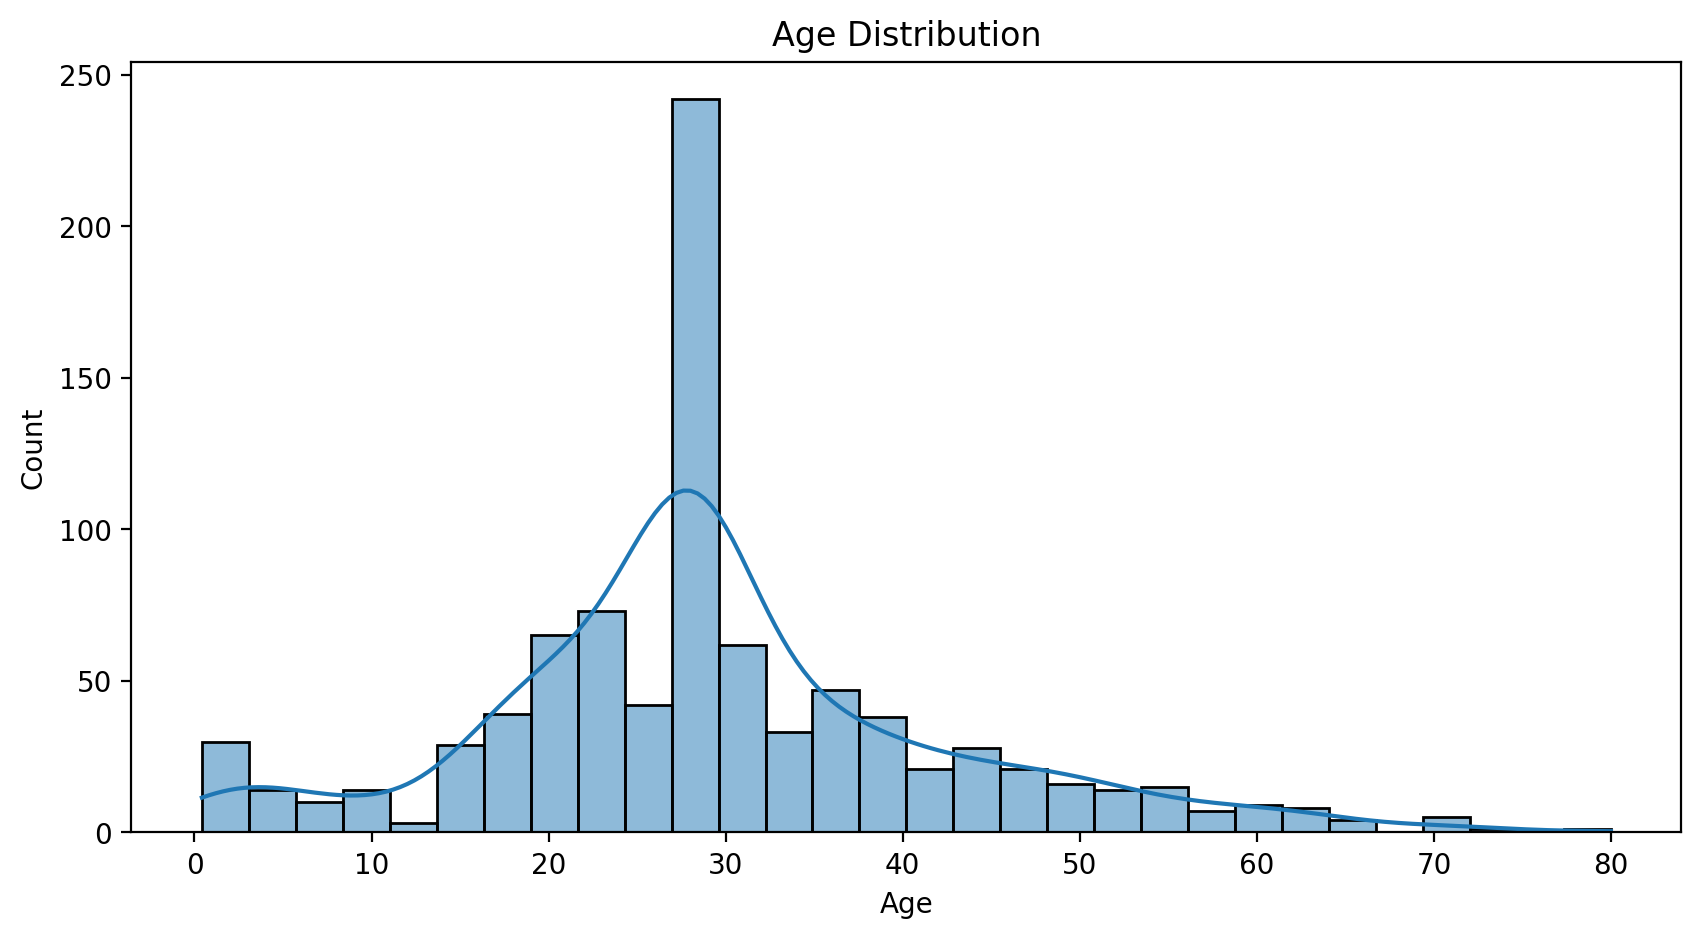

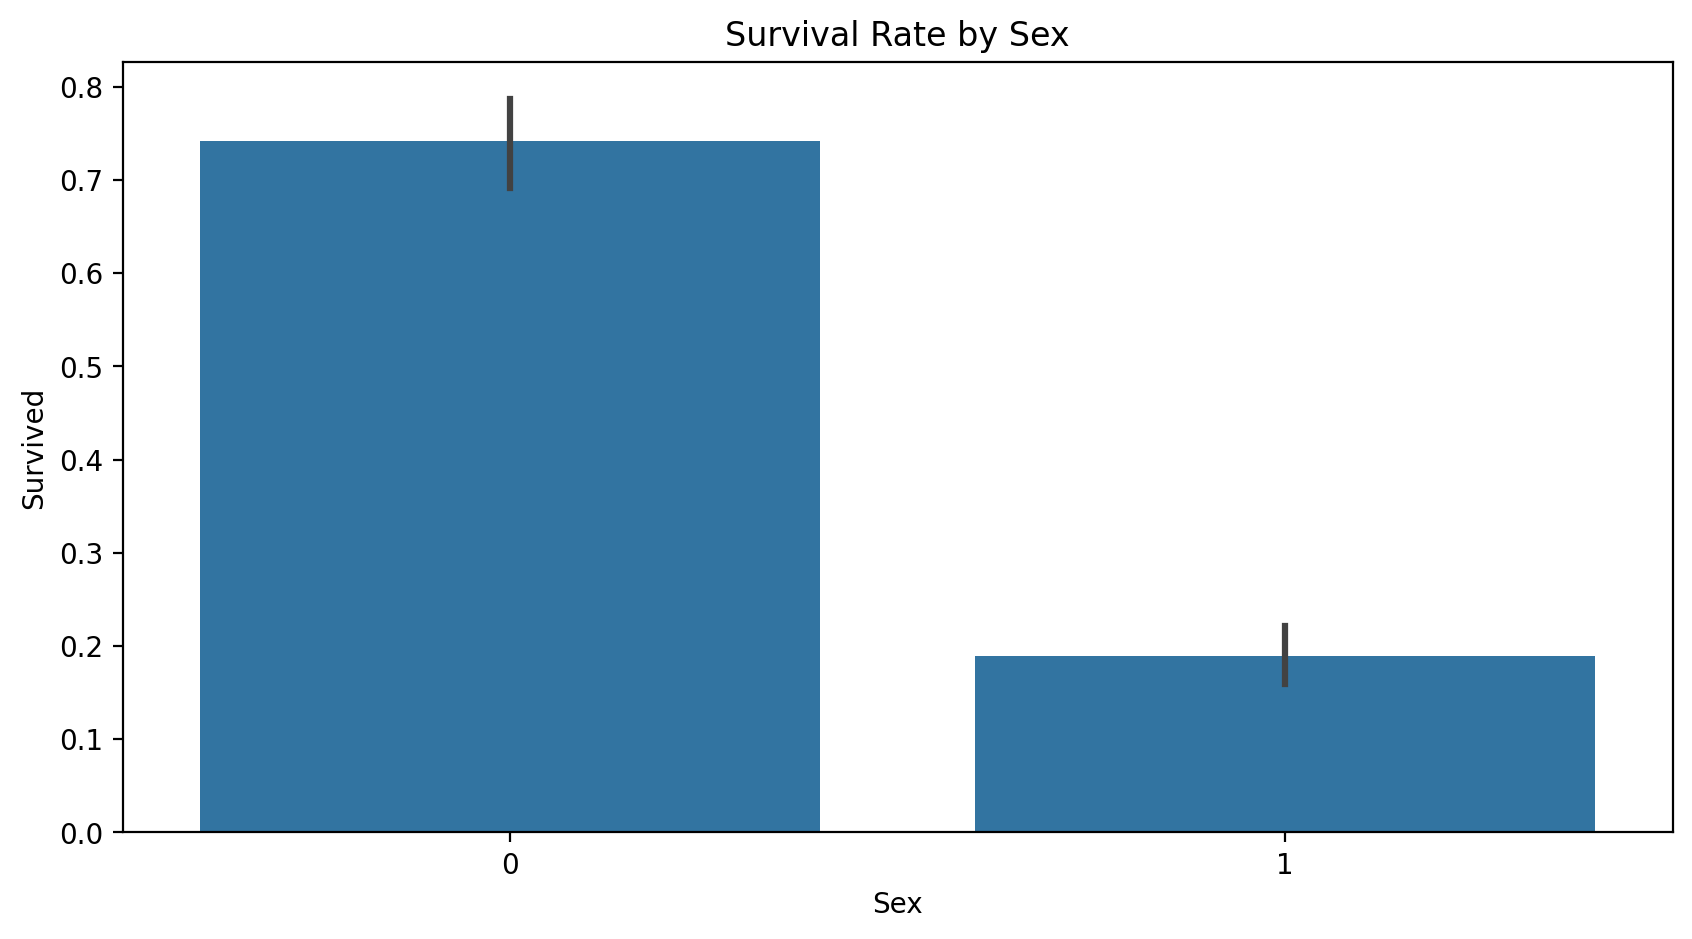

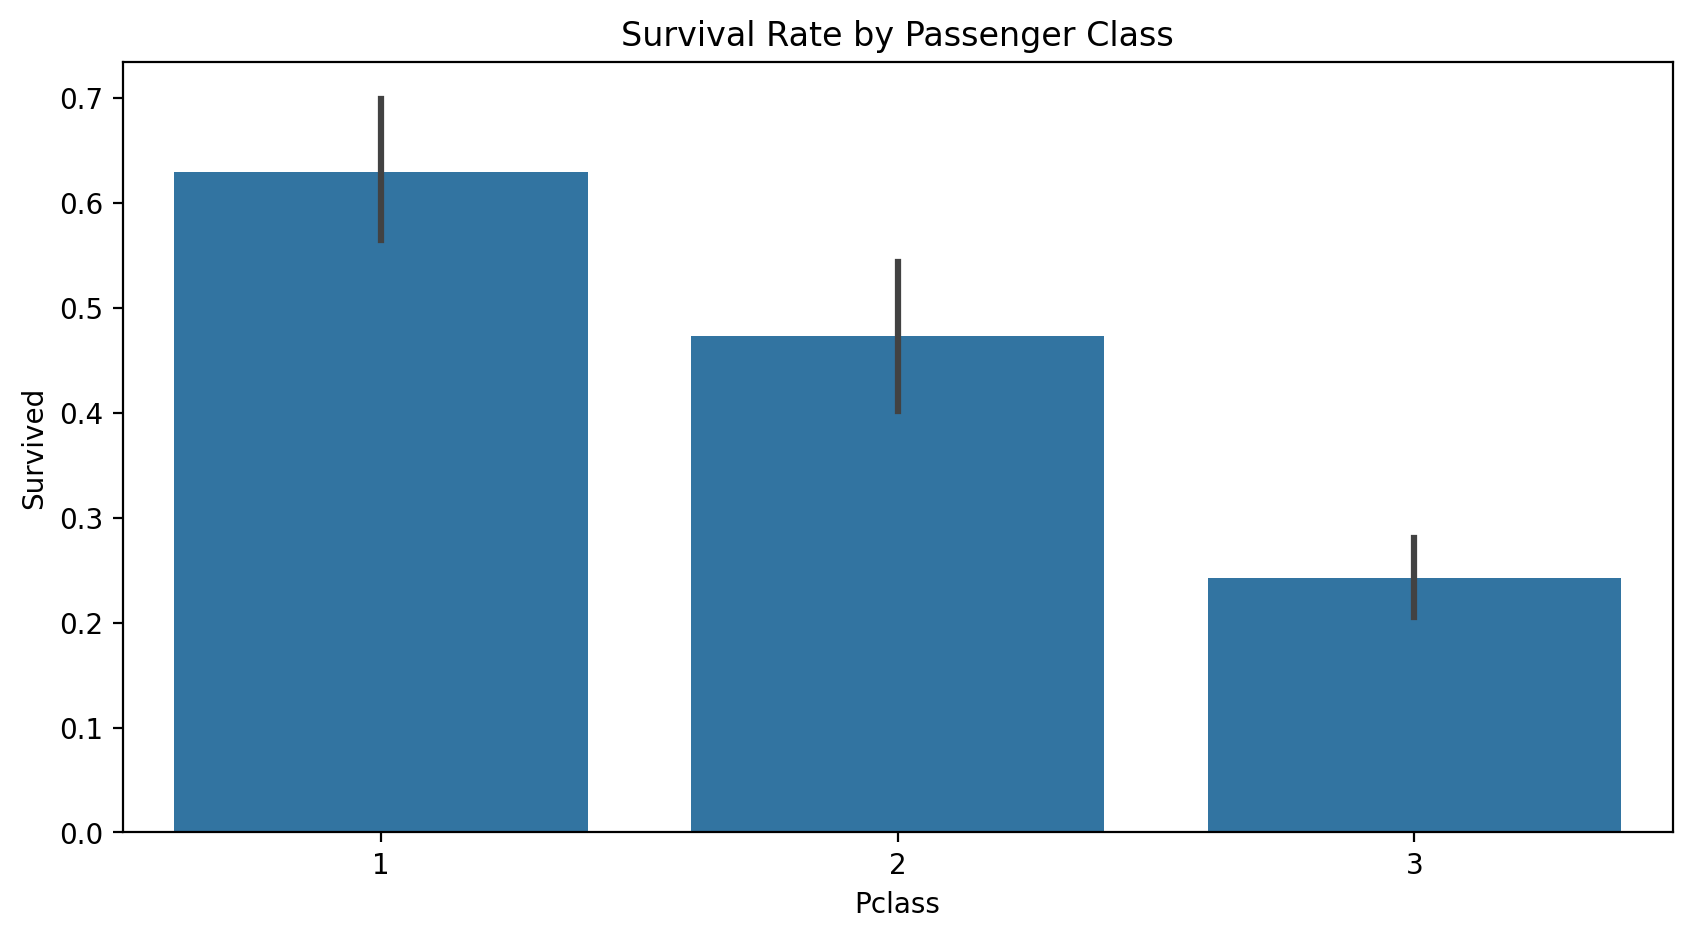

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Visualize the survival rate by 'Sex'
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Visualize the survival rate by 'Pclass'
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


In [14]:
# Check for any remaining missing values
print(df.isnull().sum())

# Final check of the dataset
print(df.head())


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
Embarked_Q    0
Embarked_S    0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
Title_Rare    0
dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500           2       False   
1         1       1    0  38.0      1      0  71.2833           2       False   
2         1       3    0  26.0      0      0   7.9250           1       False   
3         1       1    0  35.0      1      0  53.1000           2       False   
4         0       3    1  35.0      0      0   8.0500           1       False   

   Embarked_S  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0        True       False      True      False       False  
1       False       False     False       True       False  
2        True        True     False      False       False  
3        True       False     Fa

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Define the features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(712, 13) (179, 13) (712,) (179,)


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# Initialize the Logistic Regression model
model = LogisticRegression()  

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

